In [13]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

N = 8  # Fock空间维度
b1 = tensor(destroy(N), qeye(N))  
b2 = tensor(qeye(N), destroy(N))  
omega = 1.0
g_0 = 0.1

# 定义系统的哈密顿量 H 和观测量 Q
H0 = omega * (b1.dag() * b1 + b2.dag() * b2 + 1)
H1 = g_0/(omega**2) * ((b1.dag() + b1)**2) * ((b2.dag() + b2)**2)
H =  H0 + H1  # 哈密顿量
Q5 = b1 * b1 * b2 * b2.dag()
Q6 = b1 * b1 * b2.dag() * b2
Q7 = b1 * b1.dag() * b2 * b2 
Q8 = b1.dag() * b1 * b2 * b2 

psi0_1 = tensor(basis(N, 0), basis(N, 0))

# 定义时间范围和时间间隔
t_list1 = np.linspace(0, 2500000, 2500000) 
tau1 = 0.01
times = []

# 计算随时间演化的期望值
expectation_values1=[]
expectation_values2=[]

possibility1 = []
possibility2 = []
psi_t = psi0_1

for t1 in t_list1:
    t1_1 = t1 * tau1
    times1 = [t1_1,t1_1+tau1]
    # print(times1)
    result = sesolve(H, psi_t, times1, [])
    psi_t_plus_tau1 = result.states[1]
    psi_t = result.states[0]
    expectation_value1 = psi_t_plus_tau1.dag() * Q5 * psi_t
    expectation_value2 = psi_t_plus_tau1.dag() * Q6 * psi_t
    expectation_values1.append(expectation_value1[0,0])
    expectation_values2.append(expectation_value2[0,0])
    possibility1.append(np.vdot(expectation_value1,expectation_value1)) 
    possibility2.append(np.vdot(expectation_value2,expectation_value2)) 
    times.append(t1_1)
    psi_t = psi_t_plus_tau1.copy()




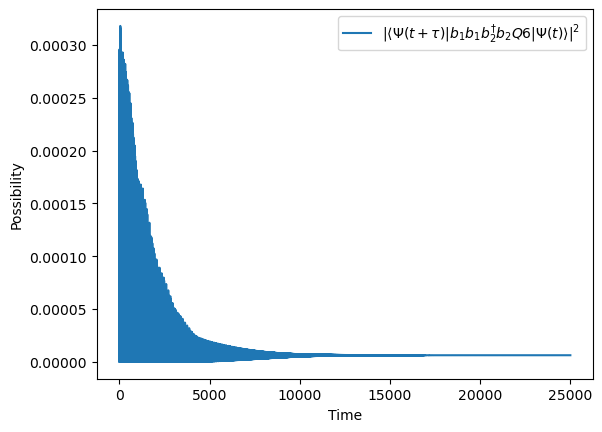

In [15]:
# 绘制结果
# plt.plot(times, possibility1, label=r'$|\langle  Ψ(t+\tau)| b_1b_1b_2b_2^{\dagger} Q5| Ψ(t) \rangle|^2$')
plt.plot(times, possibility2, label=r'$|\langle  Ψ(t+\tau)| b_1b_1b_2^{\dagger}b_2 Q6| Ψ(t) \rangle|^2$')
plt.xlabel('Time')
plt.ylabel('Possibility')
plt.legend()
plt.show()